In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as itools
import scipy as sc
from pathlib import Path
import random


HERE=Path.cwd()


In [2]:
A = np.array([[-1.01887, 0.90506, -0.00215],
    [0.82225, -1.07741, -0.17555],
    [0, 0, -1.0000]])



B = np.array([[0],
              [0],
             [1]])



n = np.shape(A)[0]
m = np.shape(B)[1]
nu = (n+m)*(n+m+1)/2

M = 1*np.diag(np.ones(n))
# print('M=', M)

R = 1*np.diag(np.ones(m))

a_c = 50

a_u = 1

a_g = 1

T_e = 30

T = 0.1


hh = 0.05
step = T/hh




In [10]:
print(Wc)
print(Wu)
print(Wg)

[[ 0.93542352]
 [-2.71203008]
 [-1.67334758]
 [-0.84165594]
 [ 1.00906503]
 [ 0.74611866]
 [ 1.71567644]
 [-0.70802537]
 [ 0.60174744]
 [ 0.02999814]]
[[-0.6255564 ]
 [-0.90968523]
 [ 0.70415023]]
[[ 0.35684434]
 [-0.77141501]
 [-1.56597044]
 [-1.82011994]
 [ 0.92071085]
 [ 0.66740944]
 [-0.92850164]
 [-0.73765538]
 [-1.36554624]
 [-1.19978208]]


In [3]:
# Q-Function Creation #

def Qcreate(Wc, n=n, m=m, nu=nu):
    
    
    Q = np.zeros((n+m, n+m))
    idx = np.triu_indices(n+m)
    crit_p = Wc
    Q[idx] = crit_p.reshape((int(nu),))
    Q = Q + Q.T
    

    Qxx = Q[0:n,0:n]
    Quu = Q[n:n+m,n:n+m]
    Qxu = Q[0:n,n:n+m]
    
    
    M = 1*np.diag(np.ones(n))
    Z = np.zeros((m,n))
    addcol = np.vstack((-1*M,Z))
#     print(addcol)
#     print(Q)
    addrow = np.hstack((-1*M,Z.T,M))
    Q_b = np.hstack((Q,addcol))
    Q_b = np.vstack((Q_b,addrow))
    
    return Q, Qxx, Quu, Qxu, Q_b




In [11]:
# Initializing Values for the weights
# 
"""

Wc = np.random.randn(int(nu),1)
Wu = np.random.randn(n,m)
Wg = np.random.randn(int(nu),1)

"""

"""
# Classical Q Learning 

Wc = np.array([[-0.54931618],
                [-0.64114918],
                [ 0.31843581],
                [-0.15568517],
                [-1.03524516],
                [ 1.34183335],
                [-0.44781045],
                [-1.8634601 ],
                [ 0.15721681],
                [ 1.1719134 ]])

Wu = np.array([[-0.19537444],
                [-0.28853427],
                [ 0.2427774 ]])

Wg = np.array([[ 0.93264079],
                [ 1.06939933],
                [ 1.78630709],
                [-1.2815057 ],
                [-0.29324526],
                [-0.0112219 ],
                [-0.23725405],
                [ 0.6759874 ],
                [-1.26104943],
                [ 1.19586878]])

"""
"""
# Internal reward Scheme:

Wc = np.array([[ 0.26699675],
                [ 1.08245529],
                [ 2.0197617 ],
                [-1.1148006 ],
                [ 1.06323785],
                [-0.15307043],
                [-0.55891837],
                [ 0.08430668],
                [-0.67201732],
                [-0.50182792]])

Wu = np.array([[-0.3595961 ],
                [-0.3777054 ],
                [-1.03987655]])

Wg = np.array([[ 1.76624432],
                [-0.74498684],
                [ 0.5369254 ],
                [ 0.4743483 ],
                [ 0.89093263],
                [ 0.20520299],
                [ 0.13273668],
                [ 2.02310997],
                [-1.15165167],
                [-0.99180113]])

"""

"""
# New values that work for IR

Wc = np.array([[ 0.34997061],
                [ 1.57960023],
                [ 0.44496692],
                [-0.7099352 ],
                [-0.1550738 ],
                [ 0.718154  ],
                [ 0.69243251],
                [ 1.64672742],
                [ 1.1941507 ],
                [ 0.83219904]])

Wu = np.array([[-1.14962651],
                [-0.75642592],
                [ 0.236102  ]])

Wg = np.array([[-0.97269042],
                [-0.02188267],
                [-0.36579582],
                [-0.99443624],
                [ 1.3802321 ],
                [-0.73501674],
                [-1.86555216],
                [-0.77579731],
                [ 1.3105673 ],
                [ 0.1937905 ]])

"""
# """
# New values that work for IR+ER

Wc = np.array([[ 0.93542352]
                [-2.71203008],
                [-1.67334758],
                [-0.84165594],
                [ 1.00906503],
                [ 0.74611866],
                [ 1.71567644],
                [-0.70802537],
                [ 0.60174744],
                [ 0.02999814]])

Wu = np.array([[-0.6255564 ],
                [-0.90968523],
                [ 0.70415023]])

Wg = np.array([[ 0.35684434],
                [-0.77141501],
                [-1.56597044],
                [-1.82011994],
                [ 0.92071085],
                [ 0.66740944],
                [-0.92850164],
                [-0.73765538],
                [-1.36554624],
                [-1.19978208]])

# """

x = np.array([[1, 1, 0]]).T

u = np.matmul(Wu.T,x)
U = np.vstack((x,u))

Wu_vec = Wu.reshape((n*m,1))
p = 0.5*hh*(np.matmul(x.T, np.matmul(M, x)) + np.matmul(u.T, np.matmul((R), u)))

Qg,_,_,_,_ = Qcreate(Wg)
s = 0.5*hh*np.matmul(U.T, np.matmul(Qg, U))


# y = np.vstack((x,Wc,Wu_vec,p))
y = np.vstack((x,Wc,Wu_vec,s))
tspan = 50

<>:105: SyntaxWarning: list indices must be integers or slices, not float; perhaps you missed a comma?
<>:105: SyntaxWarning: list indices must be integers or slices, not float; perhaps you missed a comma?
<ipython-input-11-6badaf616525>:105: SyntaxWarning: list indices must be integers or slices, not float; perhaps you missed a comma?
  Wc = np.array([[ 0.93542352]


TypeError: list indices must be integers or slices, not float

In [5]:
# Euler's Method #

def euler_state(x, u, A_mat = A, B_mat = B, h = hh):
    states_sys = np.matmul(A_mat,x) + np.matmul(B_mat,u)
    x_n = x + h*states_sys
    
    return x_n

def euler_critic(U, p, p_p, U_p, Wc, Q_mat, h = hh, cs = a_c):
    
#     current_est = np.matmul(U.T, np.matmul(Q_mat, U))
#     past_est = np.matmul(U_p.T, np.matmul(Q_mat, U_p))
    integral_error = p - p_p
    
#     ec = 0.5*(current_est - past_est + integral_error)
    basis_idx = list(itools.combinations_with_replacement(range(n+m),2))
    
    phil = []
    phil_p = []
    for i,j in basis_idx:
        phil.append(U[i]*U[j])
        phil_p.append(U_p[i]*U_p[j])
        
    phi = np.array(phil).reshape(len(basis_idx))
    phi_p = np.array(phil_p).reshape(len(basis_idx))
        
        
    sigma = phi-phi_p
    ec = np.matmul(sigma.T, Wc) + integral_error
    critic_sys = -1*cs*(sigma/(1+np.dot(sigma,sigma))**2)*ec
    # print('Wc shape is')
    # print(Wc.shape)

    # print('critic sys shape is')
    # print(critic_sys.shape)
    Wc_n = Wc + h*critic_sys.T

    # print('Wc_n shape is')
    # print(Wc_n.shape)
    return Wc_n

def euler_actor(x, Wa, Q_uu, Q_ux, h = hh, a_s = a_u):
    ea = np.matmul(Wa.T, x) + np.matmul(np.linalg.inv(Q_uu),np.matmul(Q_ux,x))
    phiu = x
    phiu_norm = phiu/(1+np.dot(phiu.T,phiu))**2
    actor_sys = -1*a_s*np.matmul(phiu_norm,ea.T)
    Wa_n = Wa + h*actor_sys
    return Wa_n

def euler_IR(Wg, U, h = hh, ug = 0, a_s=a_g):
    basis_idx = list(itools.combinations_with_replacement(range(n+m),2))
    
    phil = []
    # phil_p = []
    for i,j in basis_idx:
        phil.append(U[i]*U[j])
        # phil_p.append(U_p[i]*U_p[j])
        
    phi = np.array(phil).reshape(len(basis_idx))
    # phi_p = np.array(phil_p).reshape(len(basis_idx))
        
        
    sigma = phi

    eg = ug - np.matmul(sigma.T, Wg)
    # print('eg shape is')
    # print(eg.shape)
    goal_sys = -1*a_s*(sigma/(1+np.dot(sigma,sigma))**2)*eg

    # print('goal sys shape is')
    # print(goal_sys.shape)

    # print('Wg shape is')
    # print(Wg.shape)
    Wg_n = Wg + h*goal_sys.reshape(Wg.shape)

    # print('Wg_n shape is')
    # print(Wg_n.shape)
    return Wg_n

    



In [29]:
#Q-learning Block


U_series = []
x_series = []
u_series = []
Wc_series = []
Wu_series = []
p_series = []
rxu_series = []



U_series.append(U)
x_series.append(x)
u_series.append(u)
Wc_series.append(Wc) 
Wu_series.append(Wu)
p_series.append(p)
rxu_series.append(p)


for t in np.arange(hh,100,hh):
#     print('t=',t)
    x_n = euler_state(x_series[-1], u_series[-1])
    
    step = int(step)
#     print('Wc_series=',Wc_series)
    Q, Qxx, Quu, Qxu, Qb = Qcreate(Wc_series[-1])
    Qux = Qxu.T
    
    
    
    if len(p_series) < step:
        st = -1
#         p_pp = p_series[-step]
#         u_pp = u_series[-step]
#         x_pp = x_series[-step]
        
    else:
        st = -step
#         p_pp = p_series[-1]
#         u_pp = u_series[-1]
#         x_pp = x_series[-1]
    
    Wc_n = euler_critic(U_series[-1], p_series[-1], p_series[st], U_series[st], Wc_series[-1], Q)
    Wu_n = euler_actor(x_series[-1], Wu_series[-1], Quu, Qux)
    
#     print('Wc_n = ', Wc_n)
    
    u_new = np.matmul(Wu_n.T,x_n)
    
    p_now = np.matmul(x_n.T, np.matmul(M, x_n)) + np.matmul(u_new.T, np.matmul((R), u_new))
    
    p_n = p_series[-1] + 0.5*hh*p_now
    
    if t < T_e:
#         u_n = u_new + 0.2*np.exp(-0.0000001*t)*(np.sin(4*t**2)**2*np.cos(t**2)+np.sin(2**t)**2*np.cos(0.1*t)+np.sin(-1.2*t)**2*np.cos(0.5*t)+np.sin(t)**5+np.sin(1.12*t)**2+np.cos(2.4*t)*np.sin(2.4*t)**3)
        u_n = u_new  + 2*np.exp(-0.01*t)*(np.sin(100*t)+np.sin(t)**2*np.cos(t)+np.sin(2*t)**2*np.cos(0.1*t)+np.sin(-1.2*t)**2*np.cos(0.5*t)+np.sin(t)**5+np.sin(1.12*t)**2+np.cos(2.4*t)*np.sin(2.4*t)**3)
    else:
        u_n = u_new
        
#     p_past = np.matmul(x_series[-1].T, np.matmul(M, x_series[-1])) + np.matmul(u_series[-1].T, np.matmul((R), u_series[-1]))

    
    x_series.append(x_n)
    Wc_series.append(Wc_n)
    Wu_series.append(Wu_n)
    u_series.append(u_n)
    
    
    U_n = np.vstack((x_n,u_n))
    U_series.append(U_n)
    p_series.append(p_n)
    rxu_series.append(p_now)


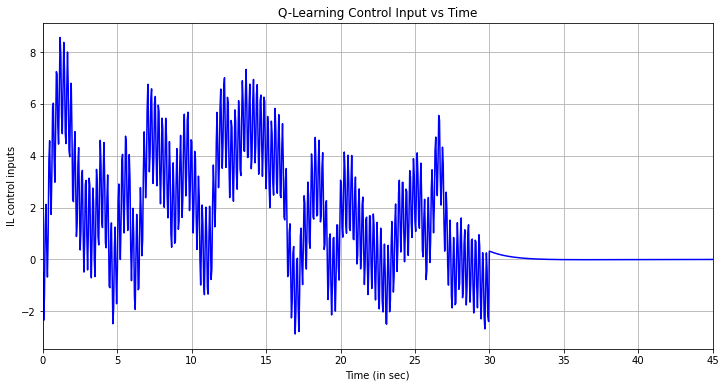

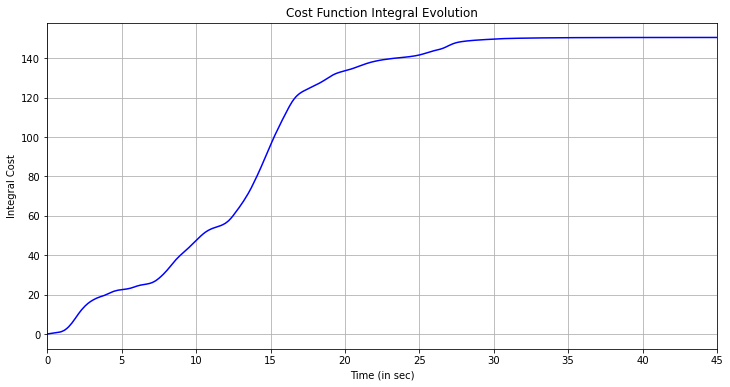

In [30]:
# Controller plot
fig3, ax3 = plt.subplots(figsize=(12, 6))
ax3.plot(np.arange(0,100,hh), np.array(u_series).reshape(2000), 'b')
plt.xlim([0, 45])
plt.title('Q-Learning Control Input vs Time')
plt.xlabel('Time (in sec)')
plt.ylabel('IL control inputs')
ax3.grid()
plt.show(fig3)

fig4, ax4 = plt.subplots(figsize=(12, 6))
ax4.plot(np.arange(0,100,hh), np.array(p_series).reshape(2000), 'b')
plt.xlim([0, 45])
plt.title('Cost Function Integral Evolution')
plt.xlabel('Time (in sec)')
plt.ylabel('Integral Cost')
ax4.grid()
plt.show(fig4)

In [10]:
## Reward Loss 2##

U_l2series = []
x_l2series = []
xh_l2series = []
u_l2series = []
Wc_l2series = []
Wch_l2series = []
Wu_l2series = []
Wuh_l2series = []
p_l2series = []
loss = []
rxu_l2series = []

e = np.zeros(x.shape)
U = np.vstack((x,u,e))

U_l2series.append(U)
x_l2series.append(x)
xh_l2series.append(x)
u_l2series.append(u)
Wc_l2series.append(Wc) 
Wch_l2series.append(Wc)
Wu_l2series.append(Wu)
Wuh_l2series.append(Wu)
p_l2series.append(p)
rxu_l2series.append(p)
loss.append(0)


for t in np.arange(hh,100,hh):
#     print('t=',t)
    x_n = euler_state(x_l2series[-1], u_l2series[-1])
    x_h = xh_l2series[-1]
    ll = loss[-1]
    
    e_x = x_n - x_h
    norme = np.matmul(e_x.T,e_x)
    
        
        
    
    step = int(step)
#     print('Wc_series=',Wc_series)
    Q, Qxx, Quu, Qxu, Qb = Qcreate(Wc_l2series[-1])
    Qux = Qxu.T
    
    
    
    if len(p_l2series) < step:
        st = -1
        
    else:
        st = -step
    
    
    Wc_h = Wch_l2series[-1]
    Wu_h = Wuh_l2series[-1]
    
    Wc_n = euler_critic(U_l2series[-1], p_l2series[-1], p_l2series[st], U_l2series[st], Wc_l2series[-1], Q)
    Wu_n = euler_actor(x, Wu_l2series[-1], Quu, Qux)
    
    if norme > 0.1:
        x_h = x_n
        e_x = 0
        Wc_h = Wc_n
        Wu_h = Wu_n
        ll = 1
    else:
        ll = 0
        
    
#     print('Wc_n = ', Wc_n)
    
    u_new = np.matmul(Wu_h.T,x_h)
    
    
    p_past = np.matmul(xh_l2series[-1].T, np.matmul(M, xh_l2series[-1])) + np.matmul(u_l2series[-1].T, np.matmul((R), u_l2series[-1]))
    p_now = np.matmul(x_h.T, np.matmul(M, x_h)) + np.matmul(u_new.T, np.matmul((R), u_new)) 
    p_n = p_l2series[-1] + 0.5*hh*p_now
    
    if t < T_e:
#         u_n = u_new + 0.2*np.exp(-0.0000001*t)*(np.sin(4*t**2)**2*np.cos(t**2)+np.sin(2**t)**2*np.cos(0.1*t)+np.sin(-1.2*t)**2*np.cos(0.5*t)+np.sin(t)**5+np.sin(1.12*t)**2+np.cos(2.4*t)*np.sin(2.4*t)**3)
        u_n = u_new  + 2*np.exp(-0.01*t)*(np.sin(100*t)+np.sin(t)**2*np.cos(t)+np.sin(2*t)**2*np.cos(0.1*t)+np.sin(-1.2*t)**2*np.cos(0.5*t)+np.sin(t)**5+np.sin(1.12*t)**2+np.cos(2.4*t)*np.sin(2.4*t)**3)
    else:
        u_n = u_new
        
        

    
    x_l2series.append(x_n)
    xh_l2series.append(x_h)
    Wc_l2series.append(Wc_n)
    Wch_l2series.append(Wc_h)
    Wu_l2series.append(Wu_n)
    Wuh_l2series.append(Wu_h)
    u_l2series.append(u_n)
    
    
    U_n = np.vstack((x_h,u_n, e_x))
    U_l2series.append(U_n)
    p_l2series.append(p_n)
    loss.append(ll)
    rxu_l2series.append(p_now)

NameError: name 'u_l2series' is not defined

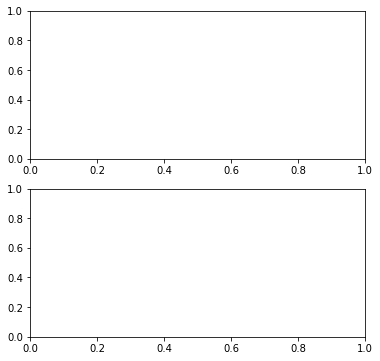

In [27]:
# Controller plot
fig5, (ax5,ax7) = plt.subplots(nrows = 2, ncols = 1, figsize=(6, 6))
ax5.plot(np.arange(0,100,hh), np.array(u_l2series).reshape(2000), 'b')
ax5.legend(['IL control inputs'])
ax5.set_xlim([0, 40])
ax5.set_title('IL vs QL Control Input in Time')
# ax5.set_xlabel('Time (in sec)')
ax5.set_ylabel('IL control inputs')
ax5.grid()

ax7.plot(np.arange(0,100,hh), np.array(u_series).reshape(2000), 'r-.')
ax7.legend(['QL control inputs'])
plt.xlim([0, 40])
# plt.title('QL Control Input vs Time')
plt.xlabel('Time (in sec)')
plt.ylabel('QL control inputs')
ax7.grid()
plt.savefig('inputfigure_l3_hh05short')
plt.show()


fig6, ax6 = plt.subplots(figsize=(6, 4))
ax6.plot(np.arange(0,100,hh), np.array(p_l2series).reshape(2000), 'b')
ax6.plot(np.arange(0,100,hh), np.array(p_series).reshape(2000), 'r-.')
ax6.legend(('IL cost', 'QL cost'))
plt.xlim([0, 40])
plt.title('Cost Function Integral Evolution')
plt.xlabel('Time (in sec)')
plt.ylabel('Integral Cost')
ax6.grid()
plt.savefig('costfigure_l3_hh05short')
plt.show(fig6)

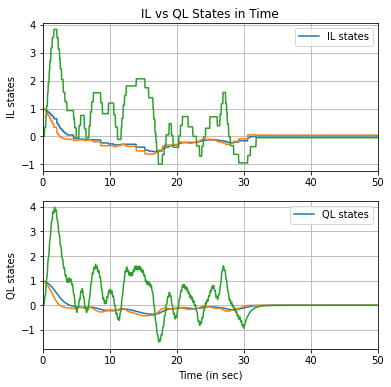

In [11]:
# State plot
states_dat = np.array(x_series).reshape(2000,3).T
states_l2dat = np.array(xh_l2series).reshape(2000,3).T
time_dat = np.arange(0,100,hh)
fig8, (ax8,ax9) = plt.subplots(nrows = 2, ncols = 1, figsize=(6, 6))
ax8.plot(time_dat, states_l2dat[0,:], time_dat, states_l2dat[1,:],time_dat, states_l2dat[2,:])
ax8.legend(['IL states'])
ax8.set_xlim([0, 50])
ax8.set_title('IL vs QL States in Time')
# ax5.set_xlabel('Time (in sec)')
ax8.set_ylabel('IL states')
ax8.grid()

ax9.plot(time_dat, states_dat[0,:], time_dat, states_dat[1,:],time_dat, states_dat[2,:])
# ax9.plot(np.arange(0,100,hh), np.array(x_series[0,:]).reshape(2000), 'r-.')
ax9.legend(['QL states'])
plt.xlim([0, 50])
# plt.title('QL Control Input vs Time')
plt.xlabel('Time (in sec)')
plt.ylabel('QL states')
ax9.grid()

plt.savefig('statefigure_l3_hh05short')
plt.show()

In [12]:
# states_dat = np.array(x_series).reshape(2000,3).T
# states_l2dat = np.array(xh_l2series).reshape(2000,3).T
# time_dat = np.arange(0,100,hh)
# control_dat = np.array(u_l2series).reshape(2000)

r_l2series = []
r_l2series.append(p)

r_series = []
r_series.append(p)


for x_h, u_h in zip(xh_l2series, u_l2series):
    p_now = np.matmul(x_h.T, np.matmul(M, x_h)) + np.matmul(u_h.T, np.matmul((R), u_h))
    r_l2series.append(p_now)
    
    
for x_n, u_n in zip(x_series, u_series):
    p_now = np.matmul(x_n.T, np.matmul(M, x_n)) + np.matmul(u_n.T, np.matmul((R), u_n))
    r_series.append(p_now)

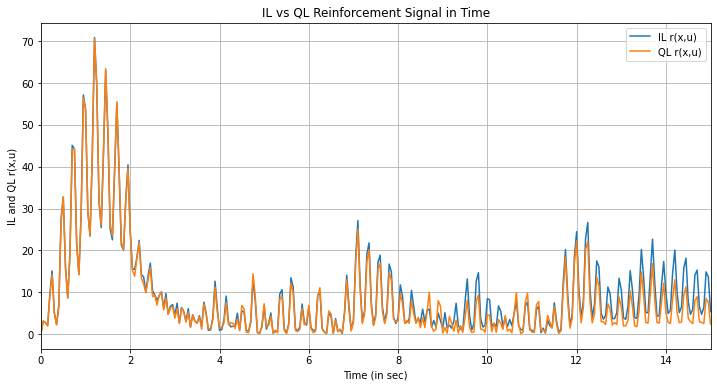

In [13]:
# r(x,u) plot
r_l2dat = np.array(r_l2series[:-1]).reshape(2000)
r_dat = np.array(r_series[:-1]).reshape(2000)
time_dat = np.arange(0,100,hh)


fig10, ax10 = plt.subplots(nrows = 1, ncols = 1, figsize=(12, 6))
ax10.plot(time_dat, r_l2dat, time_dat, r_dat)
ax10.legend(('IL r(x,u)','QL r(x,u)'))
ax10.set_xlim([0, 15])
ax10.set_title('IL vs QL Reinforcement Signal in Time')
ax10.set_xlabel('Time (in sec)')
ax10.set_ylabel('IL and QL r(x,u)')
ax10.grid()
# plt.savefig('statefigure_l3_hh05short')
plt.show()

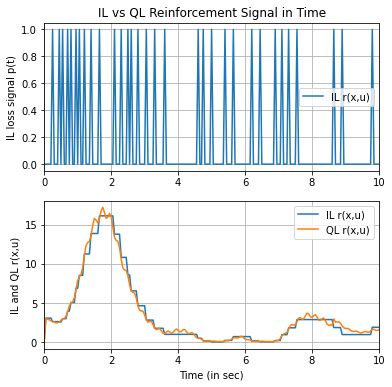

In [16]:
# p(t) plot
loss_dat = np.array(loss).reshape(2000)
time_dat = np.arange(0,100,hh)


fig11, (ax11, ax12) = plt.subplots(nrows = 2, ncols = 1, figsize=(6, 6))
ax11.plot(time_dat, loss_dat)
ax11.legend(['IL r(x,u)'])
ax11.set_xlim([0, 10])
ax11.set_title('IL vs QL Reinforcement Signal in Time')
# ax11.set_xlabel('Time (in sec)')
ax11.set_ylabel('IL loss signal p(t)')
ax11.grid()

ax12.plot(time_dat, rxu_l2dat, time_dat, rxu_dat)
ax12.legend(('IL r(x,u)','QL r(x,u)'))
ax12.set_xlim([0, 10])
# ax12.set_title('IL vs QL Reinforcement Signal in Time')
ax12.set_xlabel('Time (in sec)')
ax12.set_ylabel('IL and QL r(x,u)')
ax12.grid()


plt.savefig('lossfigure_l3_hh05short')
plt.show()

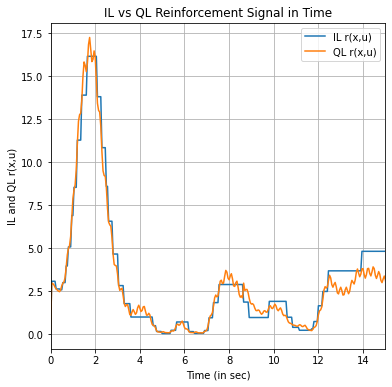

In [15]:
# r(x,u) plot
rxu_l2dat = np.array(rxu_l2series).reshape(2000)
rxu_dat = np.array(rxu_series).reshape(2000)
time_dat = np.arange(0,100,hh)


fig10, ax10 = plt.subplots(nrows = 1, ncols = 1, figsize=(6, 6))
ax10.plot(time_dat, rxu_l2dat, time_dat, rxu_dat)
ax10.legend(('IL r(x,u)','QL r(x,u)'))
ax10.set_xlim([0, 15])
ax10.set_title('IL vs QL Reinforcement Signal in Time')
ax10.set_xlabel('Time (in sec)')
ax10.set_ylabel('IL and QL r(x,u)')
ax10.grid()
# plt.savefig('rewards_l3_hh05short')
plt.show()

In [6]:
# Internal reward Block


U_int_series = []
x_int_series = []
u_int_series = []
Wc_int_series = []
Wu_int_series = []
Wg_int_series = []
s_int_series = []
sxu_int_series = []



U_int_series.append(U)
x_int_series.append(x)
u_int_series.append(u)
Wc_int_series.append(Wc) 
Wu_int_series.append(Wu)
Wg_int_series.append(Wg)
s_int_series.append(s)
sxu_int_series.append(s)


for t in np.arange(hh,100,hh):
#     print('t=',t)
    x_n = euler_state(x_int_series[-1], u_int_series[-1])
    
    step = int(step)
#     print('Wc_series=',Wc_series)
    Q, Qxx, Quu, Qxu, Qb = Qcreate(Wc_int_series[-1])
    Qux = Qxu.T

    Qg,_,_,_,_ = Qcreate(Wg_int_series[-1])
    
    
    
    
    if len(s_int_series) < step:
        st = -1
        
    else:
        st = -step
    
    Wc_n = euler_critic(U_int_series[-1], s_int_series[-1], s_int_series[st], U_int_series[st], Wc_int_series[-1], Q)
    Wu_n = euler_actor(x_int_series[-1], Wu_int_series[-1], Quu, Qux)
    Wg_n = euler_IR(Wg, U_int_series[-1], U_int_series[st])
    # print(Wg_n.shape)
    
#     print('Wc_n = ', Wc_n)
    
    u_new = np.matmul(Wu_n.T,x_n)
    
   
    
    if t < T_e:
#         u_n = u_new + 0.2*np.exp(-0.0000001*t)*(np.sin(4*t**2)**2*np.cos(t**2)+np.sin(2**t)**2*np.cos(0.1*t)+np.sin(-1.2*t)**2*np.cos(0.5*t)+np.sin(t)**5+np.sin(1.12*t)**2+np.cos(2.4*t)*np.sin(2.4*t)**3)
        u_n = u_new  + 2*np.exp(-0.01*t)*(np.sin(100*t)+np.sin(t)**2*np.cos(t)+np.sin(2*t)**2*np.cos(0.1*t)+np.sin(-1.2*t)**2*np.cos(0.5*t)+np.sin(t)**5+np.sin(1.12*t)**2+np.cos(2.4*t)*np.sin(2.4*t)**3)
    else:
        u_n = u_new
        
     
    # p_now = np.matmul(x_n.T, np.matmul(M, x_n)) + np.matmul(u_new.T, np.matmul((R), u_new))
    
    U_n = np.vstack((x_n,u_n))
    # s_now = 0.5*hh*np.matmul(U_n.T, np.matmul(Qg, U_n))
    s_now = np.matmul(U_n.T, np.matmul(Qg, U_n))
    
    s_n = s_int_series[-1] + 0.5*hh*s_now    
#     p_past = np.matmul(x_series[-1].T, np.matmul(M, x_series[-1])) + np.matmul(u_series[-1].T, np.matmul((R), u_series[-1]))

    
    x_int_series.append(x_n)
    Wc_int_series.append(Wc_n)
    Wu_int_series.append(Wu_n)
    Wg_int_series.append(Wg_n)
    u_int_series.append(u_n)
    
    
    U_n = np.vstack((x_n,u_n))
    U_int_series.append(U_n)
    s_int_series.append(s_n)
    sxu_int_series.append(s_now)


ValueError: operands could not be broadcast together with shapes (4,1) (10,1) 

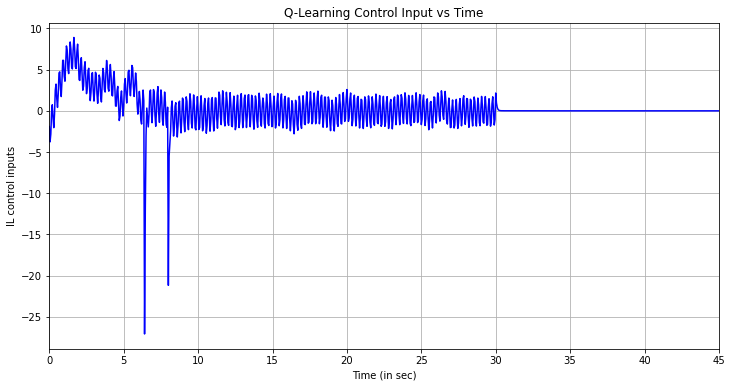

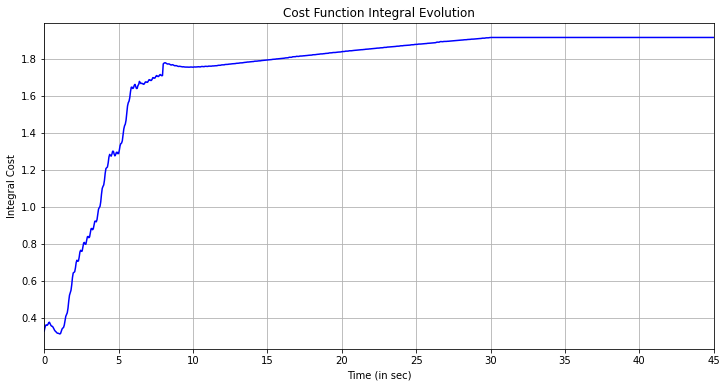

In [99]:
# Controller plot
fig8, ax8 = plt.subplots(figsize=(12, 6))
ax8.plot(np.arange(0,100,hh), np.array(u_int_series).reshape(2000), 'b')
plt.xlim([0, 45])
plt.title('Q-Learning Control Input vs Time')
plt.xlabel('Time (in sec)')
plt.ylabel('IL control inputs')
ax8.grid()
plt.show(fig8)

fig9, ax9 = plt.subplots(figsize=(12, 6))
ax9.plot(np.arange(0,100,hh), np.array(s_int_series).reshape(2000), 'b')
plt.xlim([0, 45])
plt.title('Cost Function Integral Evolution')
plt.xlabel('Time (in sec)')
plt.ylabel('Integral Cost')
ax9.grid()
plt.show(fig9)

In [12]:
# Internal reward Block tradeoff between IR and ER
pt = 1
counts = 0
countr = 0

U_ix_series = []
x_ix_series = []
u_ix_series = []
Wc_ix_series = []
Wu_ix_series = []
Wg_ix_series = []
p_ix_series = [] #Integral of p(t)r(x,u) + (1-p(t))s(x,u)
r_ix_series = [] #Integral od r(x,u)
rxu_ix_series = [] #reward signal (true)
s_ix_series =[] #Integral of internal reward s(x,u)
sxu_ix_series = [] #internal reward 



U_ix_series.append(U)
x_ix_series.append(x)
u_ix_series.append(u)
Wc_ix_series.append(Wc) 
Wu_ix_series.append(Wu)
Wg_ix_series.append(Wg)
p_ix_series.append(p) #assuming we start with access to r(x,u) (pt = 1)
r_ix_series.append(p)
rxu_ix_series.append(p)
s_ix_series.append(s)
sxu_ix_series.append(s)


for t in np.arange(hh,100,hh):
    x_n = euler_state(x_ix_series[-1], u_ix_series[-1])
    
    step = int(step)
    Q, Qxx, Quu, Qxu, Qb = Qcreate(Wc_ix_series[-1])
    Qux = Qxu.T

    Qg,_,_,_,_ = Qcreate(Wg_ix_series[-1])
    
    
    
    
    if len(p_ix_series) < step:
        st = -1   
    else:
        st = -step

    p_c = r_ix_series[-1]
    p_p = r_ix_series[st]

    s_c = s_ix_series[-1]
    s_p = s_ix_series[st]

    """
     A conditional to check if p(t) is zero or 1
    If it is zero, then we use s(t)
    If it is 1, we use rxu

    p(t)r(t) + (1-p(t))s(t)

    """
    if pt == 0:
        sg = np.matmul(U_ix_series[-1].T, np.matmul(Qg, U_ix_series[-1]))

        counts = counts + 1
        if counts == 5:
            pt = 1 - pt
            counts = 0
    elif pt == 1:
        sg = rxu_ix_series[-1]

        countr = countr + 1
        if countr == 10:
            pt = 1 - pt
            countr = 0



    
    Wc_n = euler_critic(U_ix_series[-1], p_ix_series[-1], p_ix_series[st], U_ix_series[st], Wc_ix_series[-1], Q)
    Wu_n = euler_actor(x_ix_series[-1], Wu_ix_series[-1], Quu, Qux)
    Wg_n = euler_IR(Wg_ix_series[-1], U_ix_series[-1], ug = sg) 
    
    
    u_new = np.matmul(Wu_n.T,x_n)
    
   
    
    if t < T_e:
#         u_n = u_new + 0.2*np.exp(-0.0000001*t)*(np.sin(4*t**2)**2*np.cos(t**2)+np.sin(2**t)**2*np.cos(0.1*t)+np.sin(-1.2*t)**2*np.cos(0.5*t)+np.sin(t)**5+np.sin(1.12*t)**2+np.cos(2.4*t)*np.sin(2.4*t)**3)
        u_n = u_new  + 2*np.exp(-0.01*t)*(np.sin(100*t)+np.sin(t)**2*np.cos(t)+np.sin(2*t)**2*np.cos(0.1*t)+np.sin(-1.2*t)**2*np.cos(0.5*t)+np.sin(t)**5+np.sin(1.12*t)**2+np.cos(2.4*t)*np.sin(2.4*t)**3)
    else:
        u_n = u_new
        
    """
    if p(t) = 1:
        r_now updates as in the equation below
        s_now also updates as in equation below
    if p(t) = 0:
        r_now = 0
        s_now as usual in equation below
        
    """ 
    r_now = np.matmul(x_n.T, np.matmul(M, x_n)) + np.matmul(u_new.T, np.matmul((R), u_new))
    
    U_n = np.vstack((x_n,u_n))
    s_now = np.matmul(U_n.T, np.matmul(Qg, U_n)) #removed the 0.5*hh* from the front
    
    r_n = r_ix_series[-1] + 0.5*hh*r_now  
    s_n = s_ix_series[-1] + 0.5*hh*s_now  
    p_n = p_ix_series[-1] + 0.5*hh*(pt*r_now + (1-pt)*s_now) #the combination of the past integral value plus the two rewards 
    
    x_ix_series.append(x_n)
    Wc_ix_series.append(Wc_n)
    Wu_ix_series.append(Wu_n)
    Wg_ix_series.append(Wg_n)
    u_ix_series.append(u_n)
    
    
    U_n = np.vstack((x_n,u_n))
    U_ix_series.append(U_n)

    p_ix_series.append(p_n)
    r_ix_series.append(r_n)
    rxu_ix_series.append(r_now)
    s_ix_series.append(s_n)
    sxu_ix_series.append(s_now)


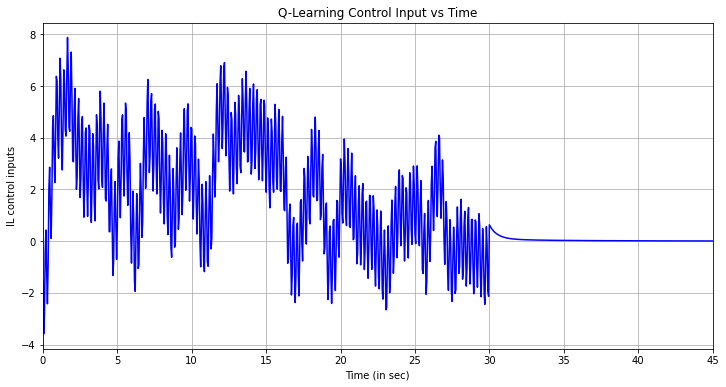

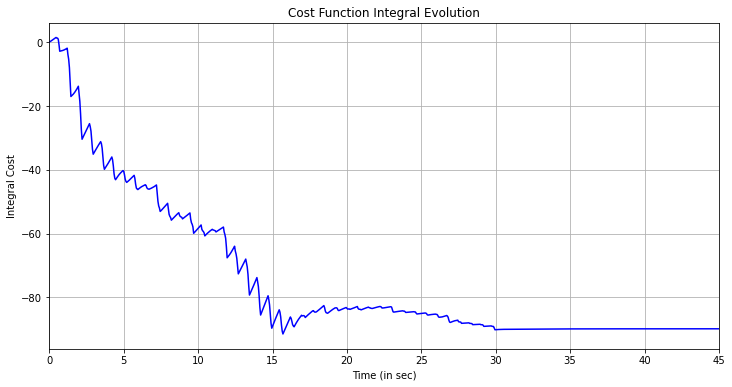

In [13]:
# Controller plot
fig3, ax3 = plt.subplots(figsize=(12, 6))
ax3.plot(np.arange(0,100,hh), np.array(u_ix_series).reshape(2000), 'b')
plt.xlim([0, 45])
plt.title('Q-Learning Control Input vs Time')
plt.xlabel('Time (in sec)')
plt.ylabel('IL control inputs')
ax3.grid()
plt.show(fig3)

fig4, ax4 = plt.subplots(figsize=(12, 6))
ax4.plot(np.arange(0,100,hh), np.array(p_ix_series).reshape(2000), 'b')
plt.xlim([0, 45])
plt.title('Cost Function Integral Evolution')
plt.xlabel('Time (in sec)')
plt.ylabel('Integral Cost')
ax4.grid()
plt.show(fig4)